<a href="https://colab.research.google.com/github/snehanshu2001/snehanshu2001/blob/main/smart_bin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

SyntaxError: ignored

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Imageclassification/Dataset/Train'
valid_path = '/content/drive/MyDrive/Imageclassification/Dataset/Test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 0s 0us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Imageclassification/Dataset/Train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Imageclassification/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1512 images belonging to 5 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Imageclassification/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 500 images belonging to 5 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
48/48 [==============================] - 433s 8s/step - loss: 4.2752 - accuracy: 0.2520 - val_loss: 3.5669 - val_accuracy: 0.1880
Epoch 2/10
48/48 [==============================] - 22s 454ms/step - loss: 1.7775 - accuracy: 0.3690 - val_loss: 1.5090 - val_accuracy: 0.3620
Epoch 3/10
48/48 [==============================] - 22s 456ms/step - loss: 1.5714 - accuracy: 0.3724 - val_loss: 1.5904 - val_accuracy: 0.4340
Epoch 4/10
48/48 [==============================] - 22s 455ms/step - loss: 1.5526 - accuracy: 0.3796 - val_loss: 1.8035 - val_accuracy: 0.3940
Epoch 5/10
48/48 [==============================] - 22s 455ms/step - loss: 1.5499 - accuracy: 0.4127 - val_loss: 1.8844 - val_accuracy: 0.3640
Epoch 6/10
48/48 [==============================] - 22s 460ms/step - loss: 1.6310 - accuracy: 0.3882 - val_loss: 1.7256 - val_accuracy: 0.4740
Epoch 7/10
48/48 [==============================] - 22s 458ms/step - loss: 1.6767 - accuracy: 0.3869 - val_loss: 1.7551 - val_accuracy: 0.3780
E

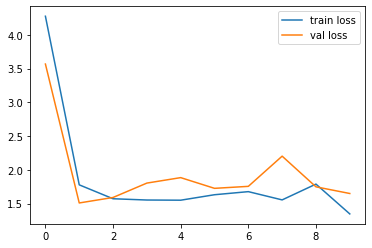

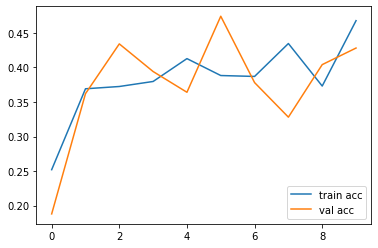

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [17]:
y_pred = model.predict(test_set)

In [18]:
y_pred


array([[9.4512338e-03, 1.4460345e-01, 1.6321111e-02, 9.7376481e-02,
        7.3224771e-01],
       [4.7016388e-04, 4.0995907e-02, 1.3004038e-02, 9.4003278e-01,
        5.4971152e-03],
       [3.4897146e-03, 6.9397129e-02, 1.2793066e-01, 4.2080510e-01,
        3.7837747e-01],
       ...,
       [4.0037978e-02, 3.7575433e-01, 1.3389701e-02, 1.0593747e-01,
        4.6488053e-01],
       [1.8825801e-03, 8.9514151e-02, 2.3227938e-02, 6.4923935e-02,
        8.2045132e-01],
       [5.4276381e-03, 2.7375606e-01, 1.3860482e-01, 2.6059285e-01,
        3.2161862e-01]], dtype=float32)

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_pred

array([4, 3, 3, 1, 3, 4, 4, 3, 1, 4, 4, 4, 1, 4, 4, 4, 3, 4, 4, 1, 2, 4,
       4, 4, 3, 4, 4, 3, 4, 4, 4, 1, 4, 4, 3, 4, 3, 2, 2, 4, 4, 4, 3, 4,
       4, 1, 1, 4, 4, 4, 2, 4, 4, 4, 3, 4, 4, 4, 2, 4, 3, 2, 1, 4, 1, 4,
       1, 2, 4, 4, 3, 4, 4, 4, 2, 1, 4, 4, 4, 1, 2, 4, 1, 4, 3, 4, 3, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 1, 1, 4, 3, 4, 4, 1, 2,
       2, 3, 2, 4, 4, 4, 1, 4, 1, 1, 1, 2, 4, 1, 1, 2, 3, 1, 1, 3, 4, 3,
       4, 2, 3, 3, 1, 4, 2, 3, 4, 4, 1, 3, 4, 4, 4, 4, 1, 4, 2, 1, 4, 1,
       4, 1, 3, 4, 4, 2, 4, 3, 1, 3, 4, 4, 4, 3, 3, 4, 1, 3, 3, 3, 1, 4,
       1, 3, 1, 1, 3, 1, 4, 4, 4, 4, 3, 3, 4, 4, 1, 1, 1, 3, 4, 4, 2, 3,
       3, 4, 1, 4, 1, 3, 4, 4, 4, 2, 4, 4, 1, 4, 2, 3, 4, 4, 4, 3, 4, 3,
       4, 4, 1, 4, 4, 4, 4, 1, 1, 3, 2, 4, 4, 2, 4, 4, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 3, 1, 4, 2, 2, 4, 4, 4, 4, 4, 4, 0, 1, 4, 4, 3, 3, 4, 2,
       1, 1, 4, 4, 4, 4, 1, 4, 3, 4, 1, 4, 1, 3, 4, 1, 4, 2, 4, 4, 1, 4,
       4, 4, 3, 3, 4, 4, 4, 4, 1, 4, 1, 3, 4, 3, 2,

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_resnet50.h5')